<a href="https://colab.research.google.com/github/BalthazazarDuc/SEF-HW2/blob/EX4/EX_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and dataset


Variable name :


df_EUR_M_cap : Monthly capitalization for EUR firms

df_EUR_M_RI: Monthly return index for EUR firms

df_EUR_Y_cap: Yearly capitalization for EUR firms

df_EUR_Y_RI: Yearly return index for EUR firms

df_M_returns: Monthly returns (computed with capitalization) for EUR firms

df_M_returns_annualized: Monthly returns annualized

df_M_volatility: Monthly volatility of EUR firms

df_M_volatility_annualized: Monthly volatility annualized

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as sco

In [2]:
df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/df_EUR_yearly_return.csv')
df_E_score=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/DS_EScore_Y.csv')

In [3]:
df_EUR_M_cap

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,NAME,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,...,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00
0,AT,AUSTRIA,EUR,AT00000VIE62,FLUGHAFEN WIEN,567.85,559.05,576.48,498.86,517.64,...,2453.36,2388.16,2366.48,2875.89,2809.31,2778.87,2719.75,2739.62,2854.20,2900.21
1,AT,AUSTRIA,EUR,AT0000652011,ERSTE GROUP BANK,1803.98,1857.91,1910.40,1827.24,1810.26,...,15823.98,13448.16,13356.15,10873.35,10824.56,9715.28,9532.79,10602.50,13099.32,13715.54
2,AT,AUSTRIA,EUR,AT0000743059,OMV,2583.84,2113.74,2065.10,2223.10,2305.32,...,15799.81,16951.82,19071.10,15313.75,13821.87,13255.37,11981.47,15085.69,16902.76,16800.81
3,AT,AUSTRIA,EUR,AT0000746409,VERBUND,1655.07,1781.21,1618.73,1446.45,1554.72,...,18088.45,18353.60,16894.99,16612.75,18659.53,16321.45,14584.20,13333.42,15082.96,14289.58
4,AT,AUSTRIA,EUR,AT0000831706,WIENERBERGER,1386.43,1283.95,1428.44,1487.43,1567.26,...,3511.64,3280.93,3173.55,2466.15,2635.59,2703.34,2324.62,2634.32,2896.84,2690.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,SE,SWEDEN,EUR,SE0015988019,NIBE INDUSTRIER,61.11,64.39,68.47,67.18,65.64,...,20097.57,17739.52,15508.29,13362.37,17802.84,16809.54,16082.16,14214.49,16381.75,16615.26
504,SE,SWEDEN,EUR,SE0016589188,ELECTROLUX B,7593.79,6702.68,6739.48,6026.53,6006.13,...,4617.69,4245.08,4258.84,3692.71,3933.26,3496.16,2878.77,3389.53,3828.45,3714.02
505,SE,SWEDEN,EUR,SE0017486889,ATLAS COPCO A,3539.84,3231.37,3400.32,3273.63,3104.37,...,44287.14,38732.62,37523.50,31313.66,38867.54,34336.09,31707.46,35865.30,40666.87,39667.59
506,SE,SWEDEN,EUR,SE0018012494,MODERN TIMES GROUP MTG B,2083.35,2318.42,2166.79,2195.59,1990.56,...,1627.46,1177.55,1294.68,883.00,1307.19,1119.39,846.93,951.81,978.44,1087.43


In [4]:
df_EUR_M_RI

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,NAME,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,...,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00
0,AT,AUSTRIA,EUR,AT00000VIE62,FLUGHAFEN WIEN,156.25,153.83,158.62,137.27,148.95,...,1073.50,1044.97,1035.49,1258.39,1229.26,1215.93,1190.06,1198.76,1248.90,1269.03
1,AT,AUSTRIA,EUR,AT0000652011,ERSTE GROUP BANK,94.91,97.74,100.50,96.13,97.86,...,567.30,482.13,504.75,410.92,409.07,367.15,360.26,400.68,495.04,518.33
2,AT,AUSTRIA,EUR,AT0000743059,OMV,389.64,318.75,311.41,335.24,356.91,...,4277.87,4589.77,5163.58,4341.76,3918.78,3758.17,3396.99,4277.10,4792.28,4763.37
3,AT,AUSTRIA,EUR,AT0000746409,VERBUND,524.60,564.59,518.56,463.37,498.05,...,8285.25,8406.71,7820.72,7690.07,8637.53,7555.23,6751.05,6172.06,6981.93,6614.67
4,AT,AUSTRIA,EUR,AT0000831706,WIENERBERGER,2379.46,2203.58,2451.55,2552.81,2746.80,...,6331.35,5915.37,5895.80,4581.59,4896.37,5022.24,4318.66,4894.01,5548.18,5152.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,SE,SWEDEN,EUR,SE0015988019,NIBE INDUSTRIER,17.82,18.78,19.97,19.59,19.61,...,6003.53,5299.14,4659.33,4014.61,5348.71,5050.28,4831.75,4270.62,4921.75,4991.91
504,SE,SWEDEN,EUR,SE0016589188,ELECTROLUX B,533.00,470.45,473.03,432.63,431.17,...,2196.55,2209.15,2216.31,1921.70,2046.88,1819.41,1558.19,1834.65,2072.22,2010.28
505,SE,SWEDEN,EUR,SE0017486889,ATLAS COPCO A,221.48,202.18,212.75,209.47,198.64,...,8565.58,7554.67,7456.44,6222.46,7723.51,6823.05,6300.71,7188.93,8151.37,7951.07
506,SE,SWEDEN,EUR,SE0018012494,MODERN TIMES GROUP MTG B,76.83,85.51,79.92,80.98,73.42,...,128.27,92.81,102.04,91.70,117.58,100.69,76.18,85.61,88.01,97.81


In [5]:
df_EUR_M_RI.set_index('NAME', inplace = True)
df_EUR_M_cap.set_index('NAME', inplace = True)
df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)
df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)
df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2000-01-01"))]
df_EUR_M_RI_T = df_EUR_M_RI_08.T
df_M_returns = df_EUR_M_RI_T.pct_change()
df_M_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_M_returns_annualized = df_M_returns.mean() * 12

In [6]:
deviations = df_M_returns - df_M_returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

df_M_volatility = np.sqrt(mean_squared_deviations)
df_M_volatility_annualized = df_M_volatility*(12**0.5)

#Benchmark portfolio (value-weighted)

##E_score for 2008 to 2022 period

In [7]:
df_E_score.set_index('NAME', inplace = True)
df_E_score = df_E_score.drop(df_E_score.columns[:10], axis=1)




In [8]:
df_E_score

,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022
NAME,,,,,,,,,,,,,,,
SCHLUMBERGER,62.90,65.99,53.17,55.02,64.03,64.75,75.71,71.54,73.65,85.87,81.71,80.89,78.25,87.80,86.10
STRABAG SE,22.87,30.90,44.29,58.66,49.97,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89
FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
RAIFFEISEN BANK INTL.,41.52,37.08,66.61,66.05,66.84,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64
ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XILINX DEAD - DELIST.15/02/22,23.79,41.03,43.59,30.65,36.47,33.70,25.88,27.68,38.31,41.42,NaN,56.70,57.38,NaN,NaN
XEROX HOLDINGS,91.97,86.86,84.98,82.44,79.45,79.45,79.67,85.00,92.80,77.37,74.08,76.22,73.46,77.11,74.54
YUM! BRANDS,59.62,59.09,61.04,59.72,70.28,62.91,66.98,76.89,80.63,80.92,82.19,84.67,88.84,87.72,NaN


In [9]:
#Preparing to cleanthe df_E_score
name_list=pd.merge(df_EUR_M_cap, df_E_score, on='NAME')

firms_list = name_list.index.tolist()
df_firms_list = pd.DataFrame(firms_list)
df_firms_list.rename(columns={df_firms_list.columns[0]: "NAME"}, inplace=True)


In [10]:
df_E_score_EU=pd.merge(df_E_score, df_firms_list, on='NAME')
df_E_score_EU = df_E_score_EU.set_index('NAME')
df_E_score_EU



,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022
NAME,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
OMV,52.86,64.66,63.40,72.96,76.24,72.37,61.29,61.11,66.68,65.86,65.18,66.14,75.46,76.95,76.63
VERBUND,73.42,67.51,76.45,74.23,72.24,81.88,83.45,85.74,91.43,90.78,89.56,93.51,93.02,88.44,87.57
WIENERBERGER,34.94,58.72,61.92,63.01,62.76,67.09,72.18,78.38,79.53,74.39,84.17,83.03,75.39,68.49,68.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,31.47,23.81,30.74,25.42,27.49,24.15,18.09,22.63,25.97,28.09,24.19,44.44,51.98,69.21,74.84
ELECTROLUX B,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91
ATLAS COPCO A,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82


In [11]:
#Let's check for nan value

isna=df_E_score_EU.isna().sum(axis=1).sum(axis=0)
isna

38

In [12]:
#We have 38 nan, We will just change the NaN by the previous value
df_E_score_EU.fillna(method='bfill', inplace=True)

In [13]:
df_E_score_EU.isna().sum(axis=0)

x2008    0
x2009    0
x2010    0
x2011    0
x2012    0
x2013    0
x2014    0
x2015    0
x2016    0
x2017    0
x2018    0
x2019    0
x2020    0
x2021    0
x2022    0
dtype: int64

In [14]:
df_E_score_EU

,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022
NAME,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,23.14,31.84,28.27,31.09,30.45,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,76.91
ERSTE GROUP BANK,61.22,74.29,70.81,84.47,83.02,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
OMV,52.86,64.66,63.40,72.96,76.24,72.37,61.29,61.11,66.68,65.86,65.18,66.14,75.46,76.95,76.63
VERBUND,73.42,67.51,76.45,74.23,72.24,81.88,83.45,85.74,91.43,90.78,89.56,93.51,93.02,88.44,87.57
WIENERBERGER,34.94,58.72,61.92,63.01,62.76,67.09,72.18,78.38,79.53,74.39,84.17,83.03,75.39,68.49,68.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,31.47,23.81,30.74,25.42,27.49,24.15,18.09,22.63,25.97,28.09,24.19,44.44,51.98,69.21,74.84
ELECTROLUX B,92.81,90.98,71.95,83.03,67.38,80.68,77.75,76.38,80.69,66.64,66.36,70.94,75.90,81.60,82.91
ATLAS COPCO A,75.46,74.50,77.82,86.62,81.26,82.89,79.49,76.71,76.36,79.25,81.45,82.24,84.08,84.56,80.82


##Create the value weighted portfolio for each year between 2007 to 2022 with the firms of the E_score dataframe


In [15]:
#Let's keep the same firms for the weights
df_EUR_M_cap=pd.merge(df_EUR_M_cap, df_firms_list, on='NAME')
df_EUR_M_cap = df_EUR_M_cap.set_index('NAME')
df_EUR_M_cap

,ISIN_First2,Unnamed: 1,Unnamed: 2,ISIN,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,...,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,AT,AUSTRIA,EUR,AT00000VIE62,567.85,559.05,576.48,498.86,517.64,554.94,...,2453.36,2388.16,2366.48,2875.89,2809.31,2778.87,2719.75,2739.62,2854.20,2900.21
ERSTE GROUP BANK,AT,AUSTRIA,EUR,AT0000652011,1803.98,1857.91,1910.40,1827.24,1810.26,1887.98,...,15823.98,13448.16,13356.15,10873.35,10824.56,9715.28,9532.79,10602.50,13099.32,13715.54
OMV,AT,AUSTRIA,EUR,AT0000743059,2583.84,2113.74,2065.10,2223.10,2305.32,2355.20,...,15799.81,16951.82,19071.10,15313.75,13821.87,13255.37,11981.47,15085.69,16902.76,16800.81
VERBUND,AT,AUSTRIA,EUR,AT0000746409,1655.07,1781.21,1618.73,1446.45,1554.72,1556.20,...,18088.45,18353.60,16894.99,16612.75,18659.53,16321.45,14584.20,13333.42,15082.96,14289.58
WIENERBERGER,AT,AUSTRIA,EUR,AT0000831706,1386.43,1283.95,1428.44,1487.43,1567.26,1583.88,...,3511.64,3280.93,3173.55,2466.15,2635.59,2703.34,2324.62,2634.32,2896.84,2690.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,SE,SWEDEN,EUR,SE0015961909,197.04,212.77,232.88,218.50,209.29,195.95,...,36967.64,34052.38,31539.59,26908.59,30279.29,26713.27,24484.81,25645.89,28753.87,27149.01
ELECTROLUX B,SE,SWEDEN,EUR,SE0016589188,7593.79,6702.68,6739.48,6026.53,6006.13,5542.50,...,4617.69,4245.08,4258.84,3692.71,3933.26,3496.16,2878.77,3389.53,3828.45,3714.02
ATLAS COPCO A,SE,SWEDEN,EUR,SE0017486889,3539.84,3231.37,3400.32,3273.63,3104.37,2711.52,...,44287.14,38732.62,37523.50,31313.66,38867.54,34336.09,31707.46,35865.30,40666.87,39667.59


In [16]:

df_EUR_M_cap.drop(df_EUR_M_cap.columns[:4], axis=1, inplace=True)
df_EUR_M_cap.columns = pd.to_datetime(df_EUR_M_cap.columns)

# Filter the DataFrame for columns (years) starting from 2007
df_EUR_M_cap = df_EUR_M_cap.loc[:, (df_EUR_M_cap.columns.year >= 2007)]

# Transpose the DataFrame
df_EUR_M_cap_T = df_EUR_M_cap.transpose()

# Initialize a dictionary to store the weights for each year
weights_by_year = {}

# Loop through each year from 2007 to 2021 to get the weights for 2008 to 2022
for year in range(2007, 2022):
    # Ensure the date for year t-1 exists in the DataFrame columns
    date_for_t_minus_1 = pd.Timestamp(str(year) + '-12-31')
    if date_for_t_minus_1 in df_EUR_M_cap_T.index:
        # Get the market cap data for year t-1
        market_caps_t_minus_1 = df_EUR_M_cap_T.loc[date_for_t_minus_1]

        # Calculate the total market cap for year t-1
        total_market_cap_t_minus_1 = market_caps_t_minus_1.sum()

        # Calculate the weights for year t using market cap data from t-1
        weights_by_year[year + 1] = market_caps_t_minus_1 / total_market_cap_t_minus_1
    else:
        print(f"No market cap data available for the end of year {year}.")

# Convert the dictionary to a DataFrame, ensuring all values are list-like
df_weights_by_year = pd.DataFrame.from_dict(weights_by_year, orient='index')




In [17]:
df_weights_by_year=df_weights_by_year.T
df_weights_by_year.index.name = "NAME"
df_weights_Y=df_weights_by_year
df_weights_Y


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NAME,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.000262,0.000187,0.000153,0.000206,0.000133,0.000171,0.000203,0.000245,0.000261,0.000277,0.000370,0.000429,0.000385,0.000328,0.000232
ERSTE GROUP BANK,0.002423,0.001443,0.002054,0.002544,0.001151,0.001800,0.001723,0.001257,0.001761,0.001688,0.002032,0.001850,0.001753,0.001374,0.001845
OMV,0.002626,0.001578,0.001923,0.001786,0.001663,0.001700,0.001802,0.001095,0.001212,0.001550,0.002264,0.001855,0.001992,0.001384,0.001697
VERBUND,0.001142,0.001382,0.000937,0.000909,0.000765,0.000606,0.000418,0.000396,0.000286,0.000365,0.000449,0.000940,0.000926,0.001524,0.001748
WIENERBERGER,0.000503,0.000281,0.000314,0.000322,0.000178,0.000155,0.000214,0.000204,0.000287,0.000274,0.000310,0.000314,0.000374,0.000385,0.000387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,0.000574,0.000246,0.000547,0.001035,0.000848,0.001221,0.001234,0.001327,0.001678,0.001653,0.001886,0.002071,0.002130,0.003365,0.003759
ELECTROLUX B,0.000543,0.000511,0.001022,0.001216,0.000804,0.001135,0.000906,0.001104,0.000955,0.001002,0.001058,0.000823,0.000800,0.000734,0.000666
ATLAS COPCO A,0.001354,0.001433,0.001801,0.003024,0.003027,0.003313,0.002677,0.002942,0.002707,0.003431,0.003959,0.002584,0.003628,0.004509,0.005297


Here's the final dataset for E_score, let's resume

df_E_score_EU : E-score for all eu firms
df_weights_Y : weight value according to t-1 cap of all eu-firms

##Let's check the E-score of our investment


In [18]:
# Step 1: Standardize the year column names in df_E_score_EU
df_E_score_EU.columns = df_E_score_EU.columns.str.lstrip('x')
df_E_score_EU

# Convert year columns to integers if necessary
df_E_score_EU.columns = df_E_score_EU.columns.astype(int)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NAME,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.006064,0.005967,0.004313,0.006403,0.004055,0.004657,0.007059,0.012712,0.012378,0.021641,0.028492,0.030721,0.028909,0.025733,0.017840
ERSTE GROUP BANK,0.148350,0.107233,0.145438,0.214907,0.095561,0.150848,0.137127,0.103017,0.147662,0.147177,0.164343,0.150212,0.139285,0.105219,0.141901
OMV,0.138830,0.102063,0.121899,0.130322,0.126815,0.123016,0.110466,0.066909,0.080806,0.102088,0.147546,0.122701,0.150337,0.106524,0.130049
VERBUND,0.083862,0.093301,0.071608,0.067448,0.055290,0.049649,0.034890,0.033933,0.026159,0.033097,0.040211,0.087853,0.086118,0.134795,0.153059
WIENERBERGER,0.017574,0.016487,0.019416,0.020260,0.011146,0.010373,0.015476,0.016025,0.022813,0.020353,0.026123,0.026031,0.028171,0.026373,0.026615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,0.018074,0.005854,0.016807,0.026322,0.023315,0.029496,0.022315,0.030022,0.043590,0.046419,0.045627,0.092048,0.110728,0.232874,0.281326
ELECTROLUX B,0.050406,0.046491,0.073537,0.100944,0.054157,0.091570,0.070467,0.084330,0.077046,0.066797,0.070241,0.058367,0.060703,0.059897,0.055183
ATLAS COPCO A,0.102185,0.106726,0.140174,0.261918,0.245967,0.274623,0.212787,0.225654,0.206684,0.271890,0.322492,0.212487,0.305016,0.381264,0.428070


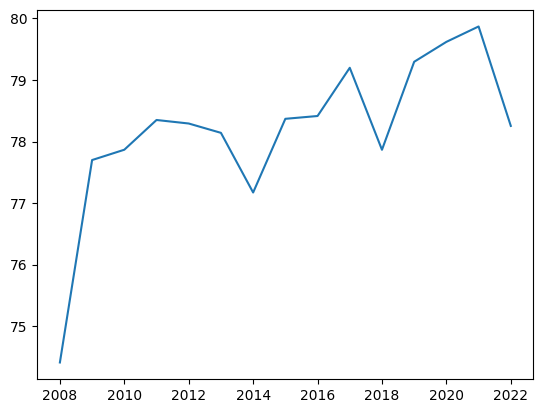

In [19]:
#Multiply the two dataframes
benchmark_e_score= df_E_score_EU * df_weights_Y

benchmark_e_score.sum().plot()
benchmark_e_score

In [20]:
df_E_score_EU.mean()

2008    53.538605
2009    57.349716
2010    59.649054
2011    61.215768
2012    61.340875
2013    61.935154
2014    61.692955
2015    63.520236
2016    64.790024
2017    66.358511
2018    65.064634
2019    67.502979
2020    68.908983
2021    69.991371
2022    70.431229
dtype: float64

In [21]:
benchmark_e_score.mean()*423

2008    74.408291
2009    77.698988
2010    77.866638
2011    78.350067
2012    78.292859
2013    78.141055
2014    77.171269
2015    78.369164
2016    78.414841
2017    79.198842
2018    77.865757
2019    79.296375
2020    79.620128
2021    79.870173
2022    78.253732
dtype: float64

In [22]:
#What are the E-score goal we should aim
E_goal=benchmark_e_score.sum()*1.2
E_goal


2008    89.289950
2009    93.238785
2010    93.439966
2011    94.020080
2012    93.951431
2013    93.769266
2014    92.605522
2015    94.042997
2016    94.097810
2017    95.038611
2018    93.438909
2019    95.155650
2020    95.544154
2021    95.844208
2022    93.904479
dtype: float64

##Let's check the returns

In [23]:
#Taking and checking the yearly returns index
df_EUR_Y_RI
df_EUR_Y_RI.set_index('NAME', inplace = True)
df_EUR_Y_RI.drop(df_EUR_Y_RI.columns[:4], axis=1, inplace=True)

df_EUR_Y_RI=pd.merge(df_firms_list, df_EUR_Y_RI, on='NAME')
df_EUR_Y_RI=df_EUR_Y_RI.set_index('NAME')
df_EUR_Y_RI

,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,...,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,147.79,169.02,126.01,166.81,248.09,417.10,408.74,580.53,702.81,277.04,...,684.58,771.62,806.23,853.19,1422.45,1416.63,1557.53,1369.41,1111.83,1269.03
ERSTE GROUP BANK,102.94,108.87,131.07,169.47,316.50,553.98,583.49,822.20,769.31,248.28,...,451.57,303.59,409.64,391.16,594.97,471.37,557.68,451.74,724.56,518.33
OMV,393.88,323.77,363.83,444.88,698.11,1450.14,2858.51,2829.82,4132.94,1357.55,...,3044.74,1763.66,1970.76,2554.70,4696.74,3335.71,4458.82,3450.98,5033.33,4763.37
VERBUND,669.42,490.55,365.21,421.52,588.39,1140.74,1851.66,2815.61,3781.10,2492.38,...,1382.09,1279.70,907.90,1161.74,1787.80,3197.60,3808.49,6593.93,8769.64,6614.67
WIENERBERGER,2579.95,2186.26,1776.97,2322.13,3626.22,6680.33,5744.58,8790.41,8444.76,2617.52,...,2882.81,2537.95,3437.56,3262.29,4602.01,3984.99,5887.01,6511.05,7637.80,5152.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,41.11,34.38,35.27,49.51,87.72,161.38,307.49,487.19,727.35,178.26,...,1412.10,1396.85,1706.31,1658.30,2350.20,2179.76,2688.98,4416.87,5417.08,3604.53
ELECTROLUX B,626.16,331.93,391.35,424.11,615.45,676.42,803.37,1100.32,1104.72,579.01,...,2089.04,2436.59,2082.78,2199.00,2933.70,1991.44,2401.04,2853.25,3360.10,2010.28
ATLAS COPCO A,257.69,195.91,204.92,182.92,345.42,447.84,723.58,1114.90,1185.90,690.59,...,2721.34,2814.76,2618.24,3322.34,4798.40,3661.16,6278.85,8213.49,11221.44,7951.07


In [24]:
#cleaing return index
df_EUR_Y_RI.columns = df_EUR_Y_RI.columns.str.lstrip('x')

#Take care of year
df_EUR_Y_RI.columns = pd.to_datetime(df_EUR_Y_RI.columns)
df_EUR_Y_RI = df_EUR_Y_RI.loc[:, (df_EUR_Y_RI.columns.year >= 2007)]

df_EUR_Y_RI

,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
NAME,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,702.81,277.04,349.14,505.73,293.67,451.48,684.58,771.62,806.23,853.19,1422.45,1416.63,1557.53,1369.41,1111.83,1269.03
ERSTE GROUP BANK,769.31,248.28,454.52,585.20,223.52,401.48,451.57,303.59,409.64,391.16,594.97,471.37,557.68,451.74,724.56,518.33
OMV,4132.94,1357.55,2389.33,2350.50,1785.15,2220.12,3044.74,1763.66,1970.76,2554.70,4696.74,3335.71,4458.82,3450.98,5033.33,4763.37
VERBUND,3781.10,2492.38,2435.25,2229.24,1633.25,1541.15,1382.09,1279.70,907.90,1161.74,1787.80,3197.60,3808.49,6593.93,8769.64,6614.67
WIENERBERGER,8444.76,2617.52,3210.74,3356.92,1596.04,1638.22,2882.81,2537.95,3437.56,3262.29,4602.01,3984.99,5887.01,6511.05,7637.80,5152.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,727.35,178.26,554.80,927.07,654.30,1105.18,1412.10,1396.85,1706.31,1658.30,2350.20,2179.76,2688.98,4416.87,5417.08,3604.53
ELECTROLUX B,1104.72,579.01,1609.21,1996.11,1170.70,2007.58,2089.04,2436.59,2082.78,2199.00,2933.70,1991.44,2401.04,2853.25,3360.10,2010.28
ATLAS COPCO A,1185.90,690.59,1256.35,2205.10,1988.06,2602.76,2721.34,2814.76,2618.24,3322.34,4798.40,3661.16,6278.85,8213.49,11221.44,7951.07


In [25]:
#transform it into yearly returns
df_EUR_Y_RI=df_EUR_Y_RI.T
df_Y_returns = df_EUR_Y_RI.pct_change()
df_Y_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Y_returns=df_Y_returns.T
df_Y_returns

,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
NAME,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,NaN,-0.605811,0.260251,0.448502,-0.419315,0.537372,0.516302,0.127144,0.044854,0.058246,0.667214,-0.004092,0.099461,-0.120781,-0.188096,0.141389
ERSTE GROUP BANK,NaN,-0.677269,0.830675,0.287512,-0.618045,0.796170,0.124763,-0.327701,0.349320,-0.045113,0.521040,-0.207742,0.183105,-0.189966,0.603931,-0.284628
OMV,NaN,-0.671529,0.760031,-0.016251,-0.240523,0.243660,0.371430,-0.420752,0.117426,0.296302,0.838470,-0.289782,0.336693,-0.226033,0.458522,-0.053634
VERBUND,NaN,-0.340832,-0.022922,-0.084595,-0.267351,-0.056391,-0.103209,-0.074083,-0.290537,0.279590,0.538899,0.788567,0.191046,0.731376,0.329956,-0.245731
WIENERBERGER,NaN,-0.690042,0.226634,0.045528,-0.524552,0.026428,0.759721,-0.119626,0.354463,-0.050987,0.410669,-0.134076,0.477296,0.106003,0.173052,-0.325393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,NaN,-0.754919,2.112308,0.670999,-0.294228,0.689103,0.277710,-0.010800,0.221541,-0.028137,0.417235,-0.072521,0.233613,0.642582,0.226452,-0.334599
ELECTROLUX B,NaN,-0.475876,1.779244,0.240429,-0.413509,0.714854,0.040576,0.166368,-0.145207,0.055800,0.334106,-0.321185,0.205680,0.188339,0.177640,-0.401720
ATLAS COPCO A,NaN,-0.417666,0.819242,0.755164,-0.098426,0.309196,0.045559,0.034329,-0.069818,0.268921,0.444283,-0.237004,0.714989,0.308120,0.366221,-0.291439


In [26]:
#formating to multiply the returns by the weights

# Convert the columns to string if not already
df_weights_Y.columns = df_weights_Y.columns.astype(str)

# Assuming the year is at the end of the string after a space, let's extract it
df_weights_Y.columns = df_weights_Y.columns.str.extract(r'\b(\d{4})\b', expand=False)

# Now let's see if the years have been extracted correctly
print(df_weights_Y.columns)
# Assuming the above extraction was successful and the years are correct
df_weights_Y.columns = pd.to_datetime(df_weights_Y.columns + '-01-01')

# Now the DataFrame should have the years in the correct datetime format
print(df_weights_Y.columns)

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', freq=None)


<Axes: >

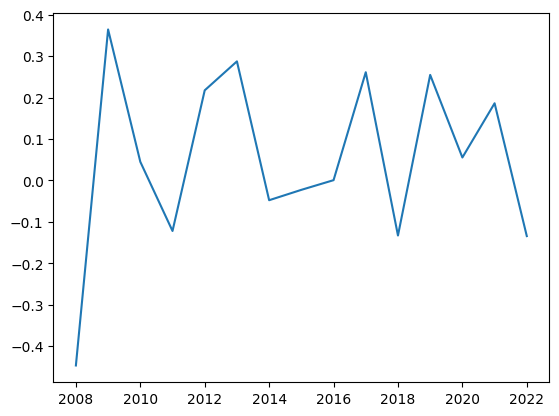

In [27]:
#create the benchmark returns dataset
df_Y_returns = df_Y_returns.drop('2007-01-01', axis=1)
benchmark_returns = df_Y_returns * df_weights_Y
benchmark_returns.columns = benchmark_returns.columns.year
benchmark_returns_sum = benchmark_returns.sum()
benchmark_returns_sum.plot()

#Porfolio with 20% e-score increase

##What we need to aim

In [64]:
E_score_goal=benchmark_e_score.sum()*1.2
E_score_goal

2008    89.289950
2009    93.238785
2010    93.439966
2011    94.020080
2012    93.951431
2013    93.769266
2014    92.605522
2015    94.042997
2016    94.097810
2017    95.038611
2018    93.438909
2019    95.155650
2020    95.544154
2021    95.844208
2022    93.904479
dtype: float64

In [29]:
covariance_matrix_assets = df_Y_returns.T.cov()

##with a for loop

In [30]:
df_M_returns=df_M_returns.dropna()
df_M_returns=df_M_returns.T
df_M_returns=pd.merge(df_M_returns, df_firms_list, on='NAME')
df_M_returns=df_M_returns.T

In [31]:
df_M_returns.columns = df_M_returns.iloc[0]
df_M_returns = df_M_returns.drop(df_M_returns.index[0])

In [32]:

import numpy as np
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint


optimal_weights_by_year = {}

for year in range(2008, 2023):
    n_assets = df_Y_returns.shape[0]

    # Define the optimization variables
    initial_guess = np.ones(n_assets) / n_assets

    # Calculate the variance-covariance matrix (on the monthly returns of the 7 previous years) for the assets
    start_date = pd.to_datetime(f"{year - 7}-12-31")
    end_date = pd.to_datetime(f"{year}-12-31")
    filtered_rows=df_M_returns.loc[(df_M_returns.index >= start_date) & (df_M_returns.index <= end_date)]
    filtered_rows =  filtered_rows.astype(float)
    covariance_matrix_assets =  filtered_rows.cov().values

    # The value-weighted portfolio weights for year Y
    alpha_Y_vw = df_weights_Y.loc[:, f"{year}-01-01"].values

    # The score of the value-weighted portfolio
    Sc_vw_Y = (df_E_score_EU.loc[:, year] * df_weights_Y.loc[:, f"{year}-01-01"]).sum()

    # Define the objective function for tracking error
    def tracking_error(alpha_Y):
        term1 = np.dot(alpha_Y.T, np.dot(covariance_matrix_assets, alpha_Y))
        term2 = -2 * np.dot(alpha_Y_vw.T, np.dot(covariance_matrix_assets, alpha_Y))
        term3 = np.dot(alpha_Y_vw.T, np.dot(covariance_matrix_assets, alpha_Y_vw))
        return term1 + term2 + term3

    # Define constraints
    cons = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights = 1
            {'type': 'ineq', 'fun': lambda x: np.sum(x * df_E_score_EU.loc[:, year].values) - 1.2 * Sc_vw_Y}]  # E_score 20% superior to benchmark
    bounds = [(0, 1) for _ in range(n_assets)]  # Weights between 0 and 1 (not negative)

    # Solve the problem
    result = minimize(tracking_error, initial_guess, bounds=bounds, constraints=cons)

    # Check for errors and store the optimal weights
    if result.success:
        optimal_weights_by_year[year] = result.x
    else:
        optimal_weights_by_year[year] = "Problem could not be solved."

# optimal_weights_by_year now contains the optimal weights for each year

In [33]:
optimal_weights_by_year=pd.DataFrame(optimal_weights_by_year)
optimal_weights_by_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.000000e+00,1.623801e-18,0.000000e+00,0.000000e+00,4.744414e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.480836e-20,0.000000e+00,1.928228e-18,3.500179e-19,1.950481e-19
1,0.000000e+00,0.000000e+00,2.689224e-17,3.152654e-18,0.000000e+00,0.000000e+00,2.772777e-18,0.000000e+00,0.000000e+00,4.004746e-18,4.970547e-18,1.354054e-18,3.342428e-18,1.119790e-17,7.270047e-18
2,1.315837e-19,0.000000e+00,0.000000e+00,3.102416e-18,2.791736e-18,0.000000e+00,0.000000e+00,2.259219e-18,0.000000e+00,7.106443e-20,0.000000e+00,1.341043e-18,0.000000e+00,7.447988e-19,0.000000e+00
3,0.000000e+00,0.000000e+00,1.699768e-19,1.077563e-18,0.000000e+00,4.764269e-19,0.000000e+00,2.940395e-18,2.866016e-04,0.000000e+00,5.118873e-03,2.092565e-02,3.507567e-03,0.000000e+00,3.820233e-05
4,0.000000e+00,1.688591e-19,0.000000e+00,9.294529e-19,2.162275e-19,0.000000e+00,5.536358e-19,1.241212e-18,0.000000e+00,2.815239e-18,0.000000e+00,0.000000e+00,7.697804e-19,6.537895e-18,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,3.598024e-20,2.739969e-18,0.000000e+00,0.000000e+00,0.000000e+00,2.369322e-18,0.000000e+00,1.737416e-19,0.000000e+00,0.000000e+00,5.291939e-19,5.808193e-19,0.000000e+00,0.000000e+00,8.274511e-20
419,8.465908e-03,2.614200e-05,0.000000e+00,3.977852e-19,5.490027e-19,0.000000e+00,0.000000e+00,4.268311e-19,0.000000e+00,3.360404e-19,2.402822e-19,0.000000e+00,2.657023e-20,0.000000e+00,0.000000e+00
420,2.480966e-19,0.000000e+00,0.000000e+00,6.635541e-19,6.924546e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.181111e-19,8.903163e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
421,4.612833e-19,0.000000e+00,0.000000e+00,5.425224e-20,8.973009e-19,0.000000e+00,4.278818e-19,8.583651e-19,1.617131e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [34]:
E_score_weights=pd.merge(optimal_weights_by_year,df_firms_list, left_index=True, right_index=True)
E_score_weights =E_score_weights.set_index('NAME')

In [35]:
WOAW=E_score_weights*df_E_score_EU
print(WOAW.sum()-E_score_goal)

#It's a sucess


2008   -2.105239e-09
2009    1.094577e-09
2010    1.678714e-09
2011    4.401585e-09
2012    2.451443e-09
2013    2.449880e-09
2014   -9.687540e-10
2015    4.190497e-09
2016    3.096758e-09
2017    1.531347e-09
2018   -3.487770e-10
2019    4.241073e-09
2020   -1.484707e-09
2021    1.143050e-09
2022    5.407514e-10
dtype: float64


In [36]:
df_Y_returns.columns = df_Y_returns.columns.year


In [37]:
WOAWreturns=E_score_weights*df_Y_returns
WOAWreturns.sum()

2008   -0.449976
2009    0.413617
2010    0.041091
2011   -0.127844
2012    0.211613
2013    0.251933
2014   -0.027100
2015   -0.029009
2016    0.017937
2017    0.295762
2018   -0.119536
2019    0.307597
2020    0.067606
2021    0.164309
2022   -0.110778
dtype: float64

In [62]:

zero_counts = (E_score_weights == 0).sum()

zero_counts

2008    109
2009    183
2010    245
2011    217
2012    189
2013    145
2014    147
2015    149
2016    179
2017    200
2018    175
2019    207
2020    172
2021    202
2022    225
dtype: int64

#Comparaison between 2 portfolios

In [38]:
IMP_E_score=pd.DataFrame(WOAW.sum())
IMP_E_score.rename(columns={'0': 'IMP_E_score'}, inplace='true')

VW_E_score=s=pd.DataFrame(benchmark_e_score.sum())
VW_E_score=VW_E_score.rename(columns={'0': 'VW_E_score'})

IMP_returns=pd.DataFrame(WOAWreturns.sum())

VW_returns=pd.DataFrame(benchmark_returns.sum())

IMP_weight=pd.DataFrame(E_score_weights)
VW_weight=pd.DataFrame(df_weights_Y)


In [39]:
# Merge IMP_E_score and VW_E_score on their index
df_ES = pd.merge(IMP_E_score, VW_E_score, left_index=True, right_index=True)

# Merge IMP_returns into the existing DataFrame
df_R = pd.merge(VW_returns, IMP_returns, left_index=True, right_index=True)

# Merge VW_returns into the existing DataFrame
df = pd.merge(df_R, df_ES, left_index=True, right_index=True)

# Now df has all four datasets merged together

df.columns = ['IMP_returns', 'VW_returns', 'IMP_E_score', 'VW_E_score']
df_EX4=df

In [40]:
df_EX4['VW_cumulative_returns'] = (1 + df_EX4['VW_returns']).cumprod()
df_EX4['IMP_cumulative_returns'] = (1 + df_EX4['IMP_returns']).cumprod()

df_EX4

,IMP_returns,VW_returns,IMP_E_score,VW_E_score,VW_cumulative_returns,IMP_cumulative_returns
2008,-0.446728,-0.449976,89.289950,74.408291,0.550024,0.553272
2009,0.364390,0.413617,93.238785,77.698988,0.777523,0.754878
2010,0.044946,0.041091,93.439966,77.866638,0.809472,0.788807
2011,-0.122047,-0.127844,94.020080,78.350067,0.705986,0.692535
2012,0.217509,0.211613,93.951431,78.292859,0.855382,0.843168
2013,0.287390,0.251933,93.769266,78.141055,1.070880,1.085485
2014,-0.047781,-0.027100,92.605522,77.171269,1.041859,1.033620
2015,-0.022750,-0.029009,94.042997,78.369164,1.011636,1.010105
2016,0.000618,0.017937,94.097810,78.414841,1.029782,1.010729
2017,0.261187,0.295762,95.038611,79.198842,1.334352,1.274718


###Plots

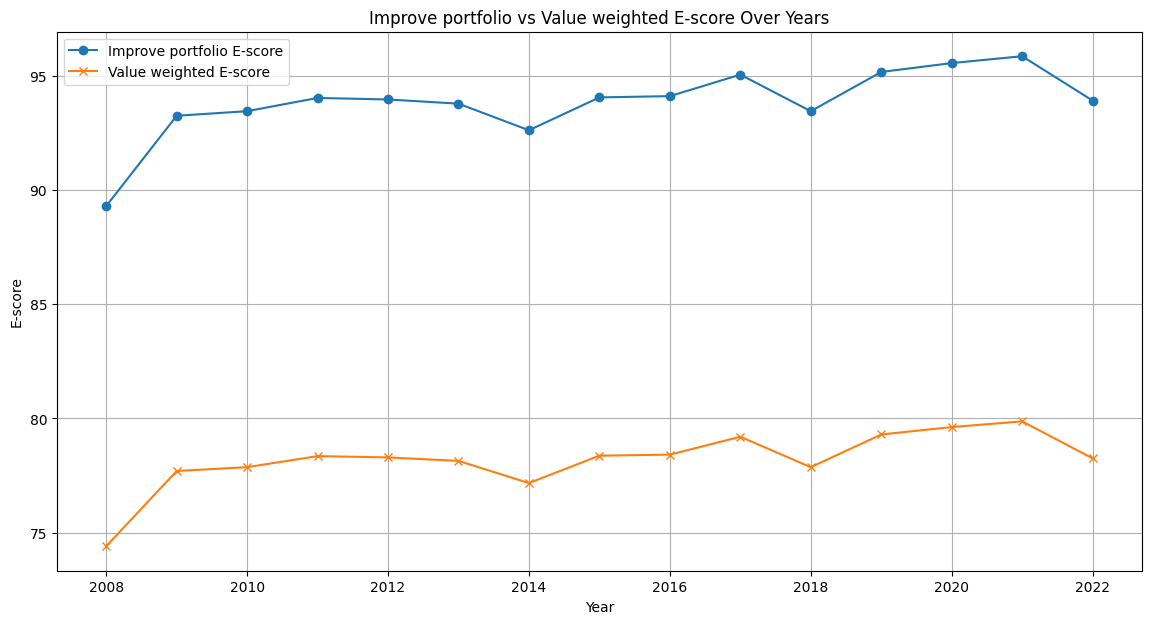

In [71]:
# Plot for E-scores
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_E_score'], label='Improve portfolio E-score', marker='o')
plt.plot(df_EX4['VW_E_score'], label='Value weighted E-score', marker='x')
plt.title('Improve portfolio vs Value weighted E-score Over Years')
plt.xlabel('Year')
plt.ylabel('E-score')
plt.legend()
plt.grid(True)
plt.show()

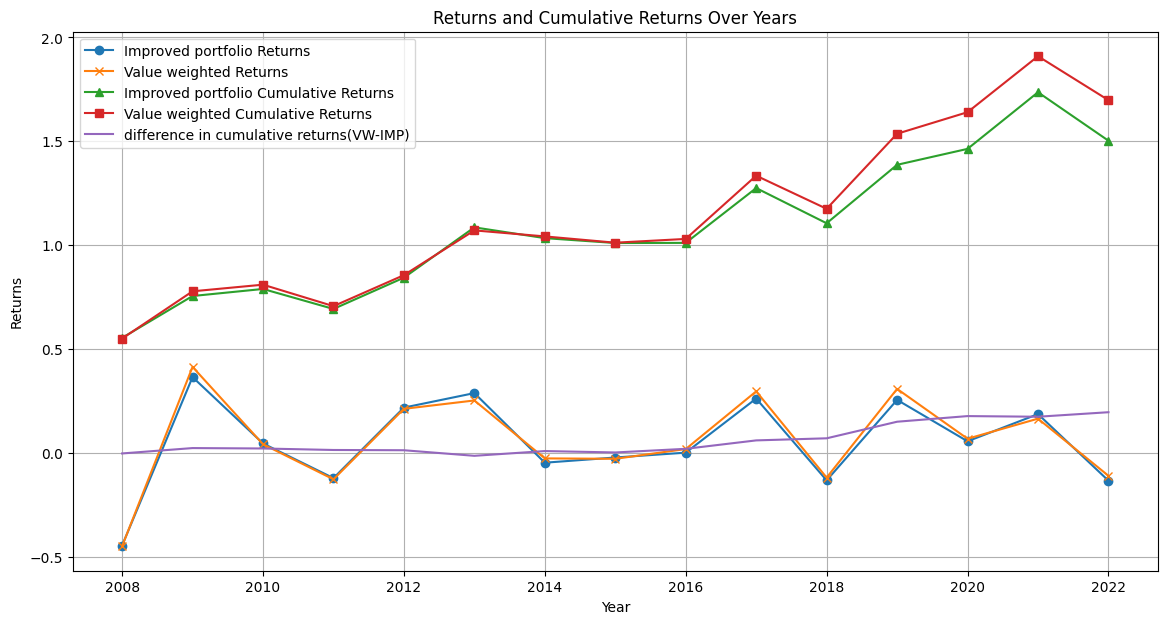

In [42]:
# Plot for returns and cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_returns'], label='Improved portfolio Returns', marker='o')
plt.plot(df_EX4['VW_returns'], label='Value weighted Returns', marker='x')
plt.plot(df_EX4['IMP_cumulative_returns'], label='Improved portfolio Cumulative Returns', marker='^')
plt.plot(df_EX4['VW_cumulative_returns'], label='Value weighted Cumulative Returns', marker='s')
plt.plot(df_EX4['VW_cumulative_returns']-df_EX4['IMP_cumulative_returns'], label='difference in cumulative returns(VW-IMP)')
plt.title('Returns and Cumulative Returns Over Years')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

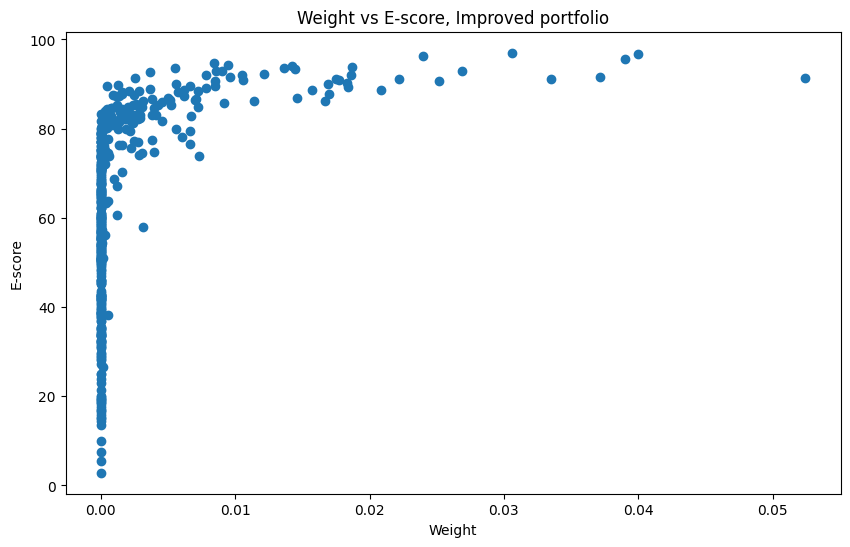

In [43]:
# Create a scatter plot with total E-scores on the x-axis and total weights on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(IMP_weight.mean(axis=1),df_E_score_EU.mean(axis=1))



# Add titles and labels
plt.title('Weight vs E-score, Improved portfolio')
plt.ylabel('E-score')
plt.xlabel('Weight')

# Show the plot
plt.show()

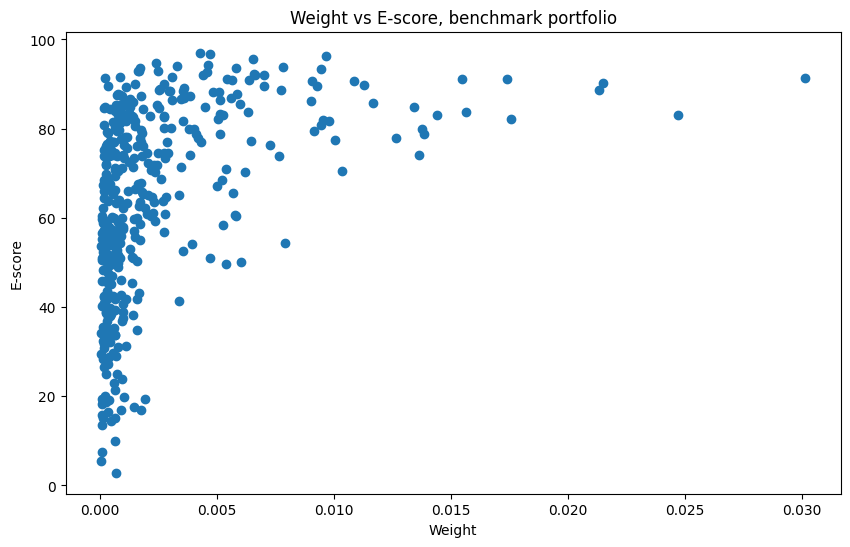

In [44]:
# Create a scatter plot with total E-scores on the x-axis and total weights on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(VW_weight.mean(axis=1), df_E_score_EU.mean(axis=1))

# Add titles and labels
plt.title('Weight vs E-score, benchmark portfolio')
plt.ylabel('E-score')
plt.xlabel('Weight')

# Show the plot
plt.show()

##Statistics

I need both risks, sharpe ratio, returns and ?

In [45]:
volatility_IMP = IMP_returns.std()
volatility_VW = VW_returns.std()
Average_return_IMP = IMP_returns.mean()
Average_return_VW = VW_returns.mean()

print(volatility_IMP, volatility_VW)

0    0.221535
dtype: float64 0    0.215389
dtype: float64


In [46]:
rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')

In [47]:
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone
rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100 # average annual risk free rate across all european countries over the 2000 - 2022 period

In [48]:
sharpe_ratio_VW = (Average_return_VW - avg_rfr) / volatility_VW
sharpe_ratio_IMP = (Average_return_IMP - avg_rfr) / volatility_IMP

In [49]:
print('Improve portfolio average return:',Average_return_IMP, 'volatility:',volatility_IMP,' sharpe_ratio: ',sharpe_ratio_IMP)
print('Benchmark portfolio average return:',Average_return_VW, 'volatility:',volatility_VW,' sharpe_ratio: ',sharpe_ratio_VW)

Improve portfolio average return: 0    0.060481
dtype: float64 volatility: 0    0.221535
dtype: float64  sharpe_ratio:  0    0.139919
dtype: float64
Benchmark portfolio average return: 0    0.051045
dtype: float64 volatility: 0    0.215389
dtype: float64  sharpe_ratio:  0    0.100098
dtype: float64


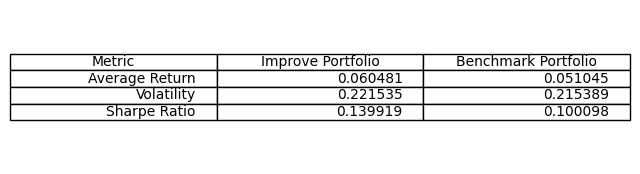

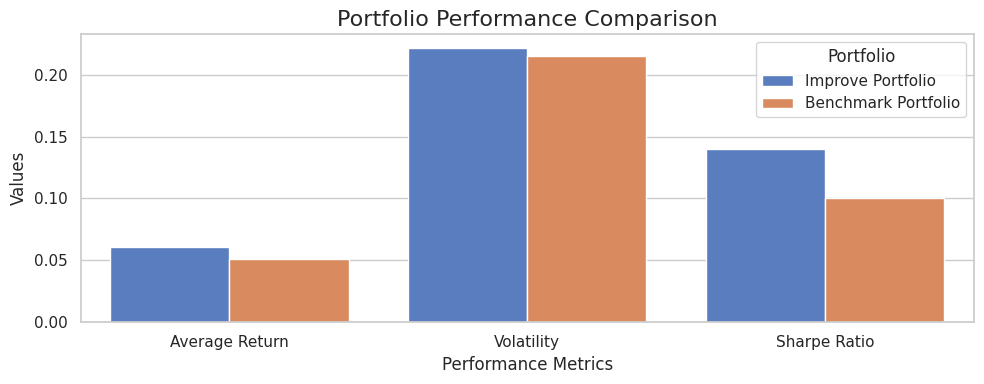

In [73]:
# Data provided by user
data = {
    "Metric": ["Average Return", "Volatility", "Sharpe Ratio"],
    "Improve Portfolio": [0.060481, 0.221535, 0.139919],
    "Benchmark Portfolio": [0.051045, 0.215389, 0.100098]
}

# Create a DataFrame
portfolio_comparison_df = pd.DataFrame(data)

# Plotting the DataFrame as a table
fig, ax = plt.subplots(figsize=(8, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=portfolio_comparison_df.values,
         colLabels=portfolio_comparison_df.columns,
         loc='center')

plt.show()

import seaborn as sns

# Set the aesthetics for the plot to make it look more professional
sns.set(style="whitegrid")

# Create a matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Use seaborn's barplot to create a grouped bar chart
sns.barplot(data=portfolio_comparison_df.melt(id_vars='Metric'),
            x='Metric', y='value', hue='variable', ax=ax, palette='muted')

# Customize the plot to make it look more professional
ax.set_title('Portfolio Performance Comparison', fontsize=16)
ax.set_xlabel('Performance Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.legend(title='Portfolio')

# Display the plot
plt.tight_layout()
plt.show()

# extra work

In [50]:
frontier_weight = pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/SEF-HW2/main/Homework_1/df_weights_high.csv')
frontier_weight = frontier_weight.drop('Unnamed: 0', axis=1)


In [51]:
frontier_weight=frontier_weight.T
min_var_weight=frontier_weight.iloc[:, 0]     #Change the number if you want to see different portfolio
min_var_weight


FLUGHAFEN WIEN              0.000000e+00
ERSTE GROUP BANK            8.872289e-17
OMV                         0.000000e+00
VERBUND                     3.549634e-17
WIENERBERGER                0.000000e+00
                                ...     
HEXAGON B                   3.338352e-17
ELECTROLUX B                0.000000e+00
ATLAS COPCO A               2.538171e-17
MODERN TIMES GROUP MTG B    0.000000e+00
BOLIDEN ORD SHS             1.120590e-18
Name: 0, Length: 423, dtype: float64

In [52]:
min_var_weight=pd.DataFrame(min_var_weight)
min_var_weight=min_var_weight.rename_axis('NAME', axis='index')

In [53]:
serie_to_multiply = min_var_weight.iloc[:, 0]
min_var_returns = df_Y_returns.mul(serie_to_multiply, axis=0)

min_var_returns.sum()

2008   -0.151557
2009    0.232045
2010    0.105332
2011    0.021026
2012    0.173333
2013    0.268927
2014    0.075286
2015    0.049343
2016   -0.037137
2017    0.152275
2018    0.001436
2019    0.200330
2020    0.083647
2021    0.144350
2022   -0.035612
dtype: float64

In [54]:
serie_to_multiply = min_var_weight.iloc[:, 0]
min_var_E_score = df_E_score_EU.mul(serie_to_multiply, axis=0)
min_var_E_score

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NAME,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ERSTE GROUP BANK,5.431615e-15,6.591223e-15,6.282468e-15,7.494422e-15,7.365774e-15,7.435865e-15,7.059680e-15,7.273502e-15,7.440301e-15,7.736636e-15,7.176794e-15,7.202524e-15,7.048146e-15,6.794399e-15,6.823677e-15
OMV,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
VERBUND,2.606141e-15,2.396358e-15,2.713695e-15,2.634893e-15,2.564255e-15,2.906440e-15,2.962169e-15,3.043456e-15,3.245430e-15,3.222358e-15,3.179052e-15,3.319263e-15,3.301869e-15,3.139296e-15,3.108414e-15
WIENERBERGER,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,1.050579e-15,7.948617e-16,1.026209e-15,8.486091e-16,9.177130e-16,8.062121e-16,6.039079e-16,7.554691e-16,8.669701e-16,9.377432e-16,8.075474e-16,1.483564e-15,1.735276e-15,2.310474e-15,2.498423e-15
ELECTROLUX B,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ATLAS COPCO A,1.915304e-15,1.890937e-15,1.975205e-15,2.198564e-15,2.062518e-15,2.103890e-15,2.017592e-15,1.947031e-15,1.938147e-15,2.011500e-15,2.067340e-15,2.087392e-15,2.134094e-15,2.146277e-15,2.051350e-15


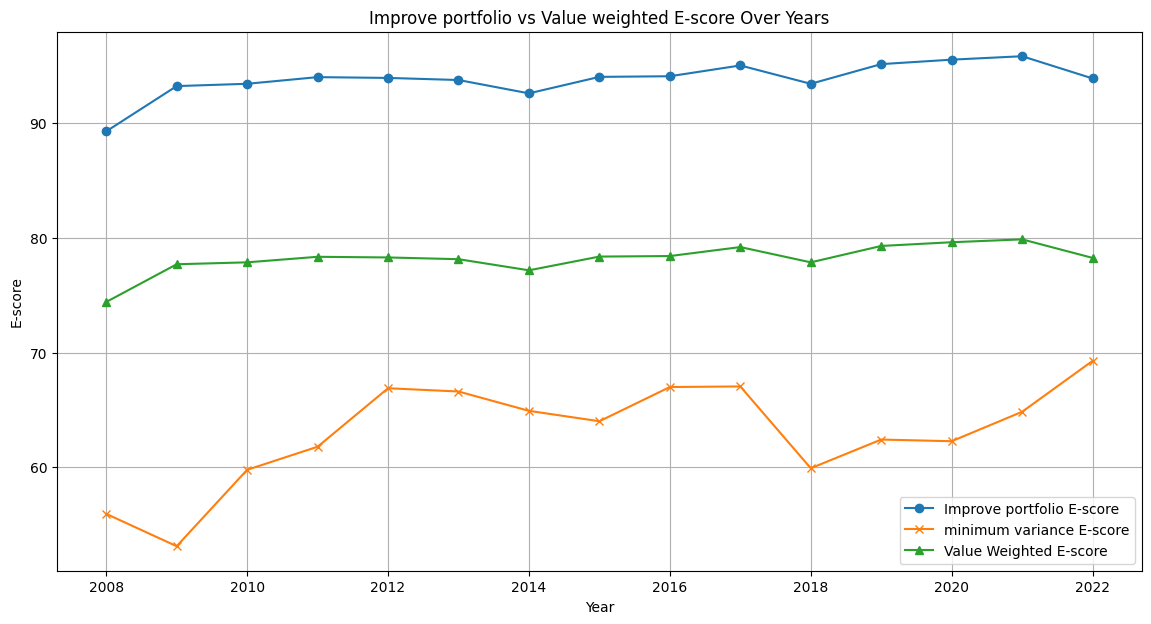

In [55]:
# Plot for E-scores
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_E_score'], label='Improve portfolio E-score', marker='o')
plt.plot(min_var_E_score.sum(), label='minimum variance E-score', marker='x')
plt.plot(df_EX4['VW_E_score'], label='Value Weighted E-score', marker='^')
plt.title('Improve portfolio vs Value weighted E-score Over Years')
plt.xlabel('Year')
plt.ylabel('E-score')
plt.legend()
plt.grid(True)
plt.show()

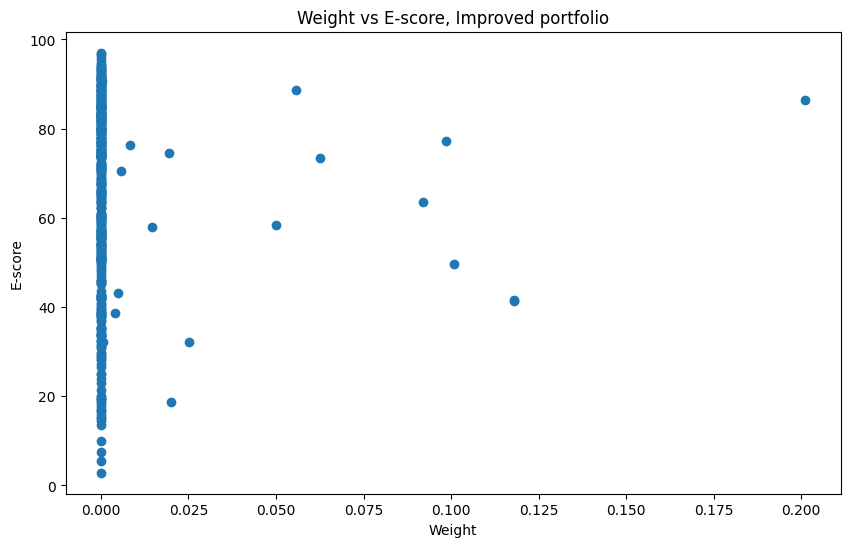

In [56]:
# Create a scatter plot with total E-scores on the x-axis and total weights on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(min_var_weight.mean(axis=1), df_E_score_EU.mean(axis=1))



# Add titles and labels
plt.title('Weight vs E-score, Improved portfolio')
plt.ylabel('E-score')
plt.xlabel('Weight')

# Show the plot
plt.show()

In [57]:
min_var_cum_returns = (1 + min_var_returns.sum(axis=0)).cumprod()


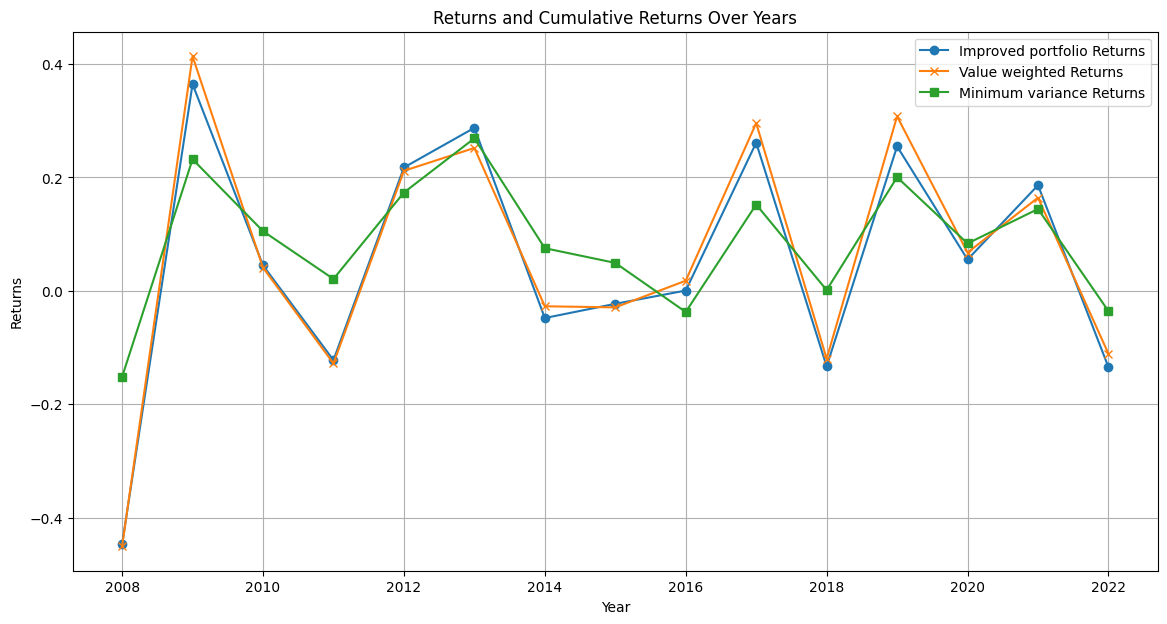

In [58]:
# Plot for returns and cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_returns'], label='Improved portfolio Returns', marker='o')
plt.plot(df_EX4['VW_returns'], label='Value weighted Returns', marker='x')
plt.plot(min_var_returns.sum(), label='Minimum variance Returns', marker='s')


plt.title('Returns and Cumulative Returns Over Years')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

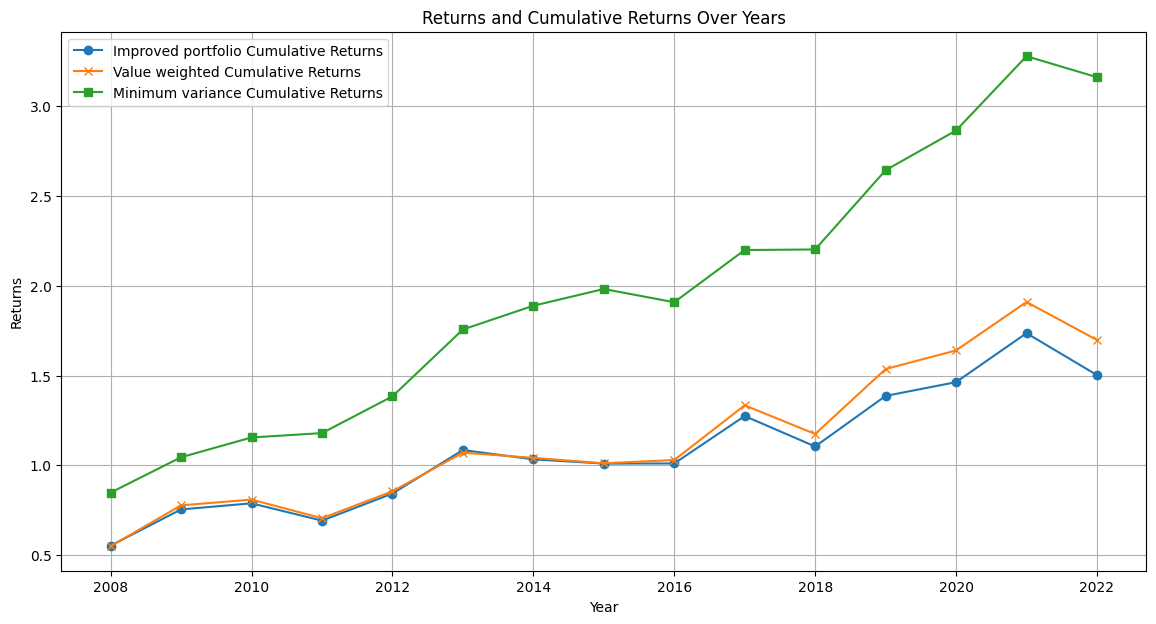

In [59]:
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_cumulative_returns'], label='Improved portfolio Cumulative Returns', marker='o')
plt.plot(df_EX4['VW_cumulative_returns'], label='Value weighted Cumulative Returns', marker='x')
plt.plot(min_var_cum_returns, label='Minimum variance Cumulative Returns', marker='s')

plt.title('Returns and Cumulative Returns Over Years')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

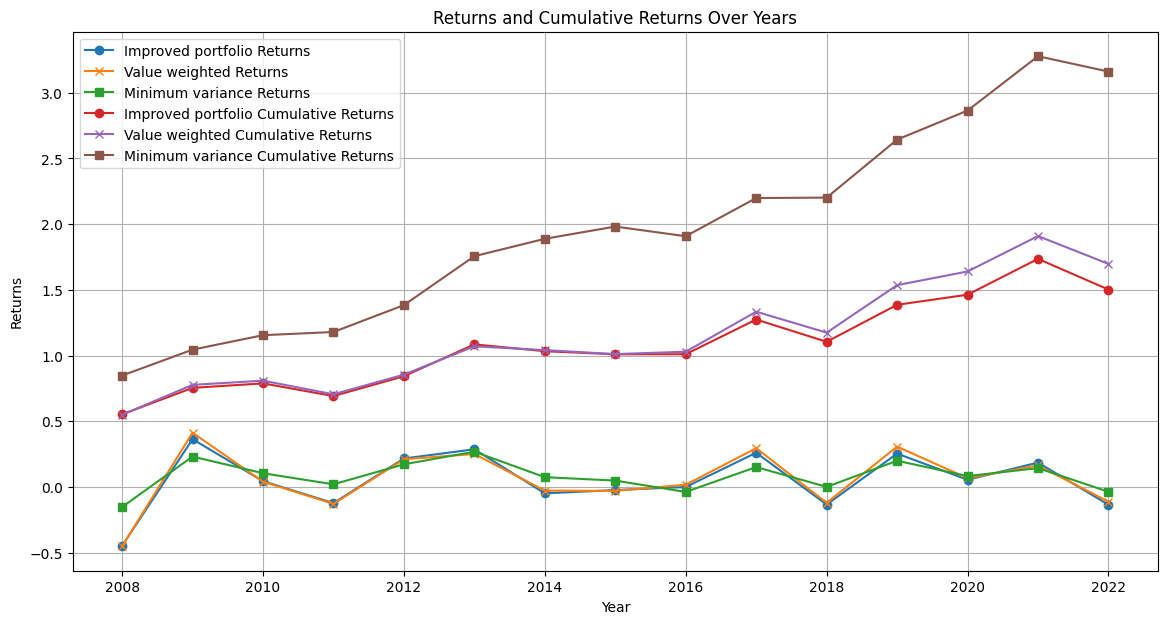

In [60]:
plt.figure(figsize=(14, 7))
plt.plot(df_EX4['IMP_returns'], label='Improved portfolio Returns', marker='o')
plt.plot(df_EX4['VW_returns'], label='Value weighted Returns', marker='x')
plt.plot(min_var_returns.sum(), label='Minimum variance Returns', marker='s')

plt.plot(df_EX4['IMP_cumulative_returns'], label='Improved portfolio Cumulative Returns', marker='o')
plt.plot(df_EX4['VW_cumulative_returns'], label='Value weighted Cumulative Returns', marker='x')
plt.plot(min_var_cum_returns, label='Minimum variance Cumulative Returns', marker='s')

plt.title('Returns and Cumulative Returns Over Years')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()